# Analyzing data from clusters FAMD-v6

In [73]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
# Configuración de pandas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading data

In [74]:
path_file = 'data/clusterizacion_v6.csv'
data = pd.read_csv(path_file)
data.head()

,Unnamed: 0,client_id,loan_id,state,arrears_days,total_paid,percentage,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,Score Bureau Empresa,Huellas de Consulta,Tiempo en el negocio,Website empresa,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Edad empresarios,Activador,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos,cluster
0,0,241,1076,PAID,17,147915805.0,0.063704,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925.0,8.0,2016,Si,Si,Si,Si,45,Internet,2.0,No,Si,16,No,2,1
1,1,241,1244,PAID,23,91852726.0,0.088889,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925.0,8.0,2016,Si,Si,Si,Si,45,Internet,2.0,No,Si,16,No,2,1
2,2,362,1469,PAID,14,15211138.0,0.086667,50000000,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No,No,924.0,2.0,2014,Si,No,Si,No,32,SocialNetworks,3.0,No,Si,3,No,0,0
3,3,428,119,LATE,64,8713879.0,0.300000,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861.0,1.0,2015,Si,No,Si,Si,44,CreditProfessionalContact,2.0,No,Si,5,No,0,0
4,4,428,120,LATE,64,8102608.0,0.300000,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861.0,1.0,2015,Si,No,Si,Si,44,CreditProfessionalContact,2.0,No,Si,5,No,0,0


In [75]:
data.isnull().any()

Unnamed: 0                      False
client_id                       False
loan_id                         False
state                           False
arrears_days                    False
total_paid                      False
percentage                      False
Monto Acumulado                 False
Uso de los recursos             False
Plazo                           False
Sector                          False
Ingresos                        False
Ubicación                       False
Estrato Mínimo                  False
Procesos judiciales             False
Alertas                         False
Score Bureau Empresa            False
Huellas de Consulta             False
Tiempo en el negocio            False
Website empresa                 False
Instagram empresa               False
LinkedIn empresa                False
LinkedIn empresarios            False
Edad empresarios                False
Activador                       False
Número de accionistas           False
Impacto     

## Data analysis

This section is to analyze clusters behaviour with two cathegorization of clients

### Cathegorical data

Text(0.5, 0.98, 'Frecuency of observation by cluster')

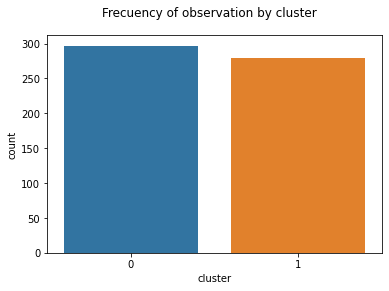

In [76]:
sns.countplot(x='cluster', data = data)
plt.suptitle('Frecuency of observation by cluster')

In [77]:
data['cluster'].value_counts()

0    297
1    280
Name: cluster, dtype: int64

In [78]:
data['arrears_days'].describe()

count     577.000000
mean       70.963605
std       130.802891
min         0.000000
25%         2.000000
50%        16.000000
75%        76.000000
max      1083.000000
Name: arrears_days, dtype: float64

We can see that there are more customers on the cluster_1 than the cluster_0

### Analyzing relationship on other variables with two clusters

In [79]:
#----------------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Quantitative = 'Column name'

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    577 non-null    int64  
 1   client_id                     577 non-null    int64  
 2   loan_id                       577 non-null    int64  
 3   state                         577 non-null    object 
 4   arrears_days                  577 non-null    int64  
 5   total_paid                    577 non-null    float64
 6   percentage                    577 non-null    float64
 7   Monto Acumulado               577 non-null    int64  
 8   Uso de los recursos           577 non-null    object 
 9   Plazo                         577 non-null    object 
 10  Sector                        577 non-null    object 
 11  Ingresos                      577 non-null    object 
 12  Ubicación                     577 non-null    object 
 13  Estra

Text(0.5, 0.98, 'Cluster vs arrears_days')

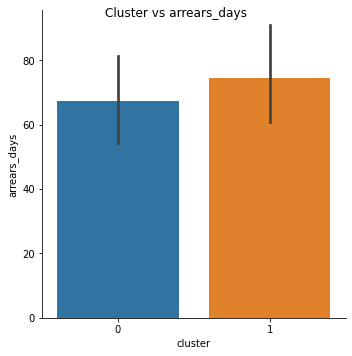

In [81]:
sns.catplot(x='cluster', y='arrears_days', kind='bar', data=data)
plt.suptitle('Cluster vs arrears_days')

On this graph we can see that cluster 1 has less arrears_days than cluster 0

Text(0.5, 0.98, 'Cluster vs Monto Acumulado')

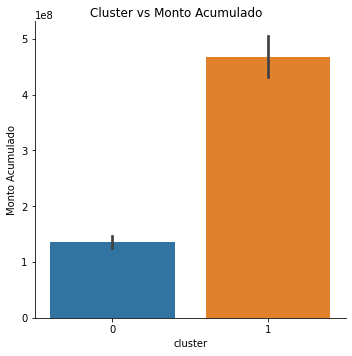

In [82]:
sns.catplot(x='cluster', y='Monto Acumulado', kind='bar', data=data)
plt.suptitle('Cluster vs Monto Acumulado')

Cluster 1 has less 'Monto Acumulado' than cluster 0

Text(0.5, 0.98, 'Cluster vs Score Bureau Empresa')

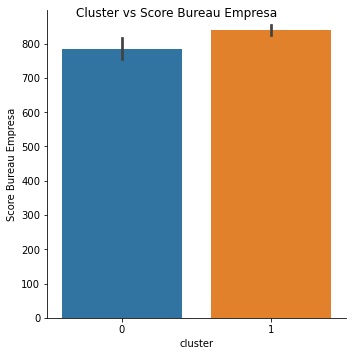

In [83]:
sns.catplot(x='cluster', y='Score Bureau Empresa', kind='bar', data=data)
plt.suptitle('Cluster vs Score Bureau Empresa')

Score Bureau between the two clusters are relatively similar

Text(0.5, 0.98, 'Cluster vs Huellas de Consulta')

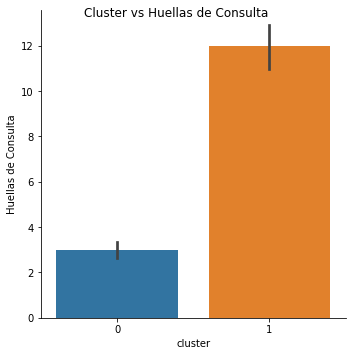

In [84]:
sns.catplot(x='cluster', y='Huellas de Consulta', kind='bar', data=data)
plt.suptitle('Cluster vs Huellas de Consulta')

Cluster 1 has less 'Huellas de consulta' than cluster 0

Text(0.5, 0.98, 'Cluster vs Número de accionistas')

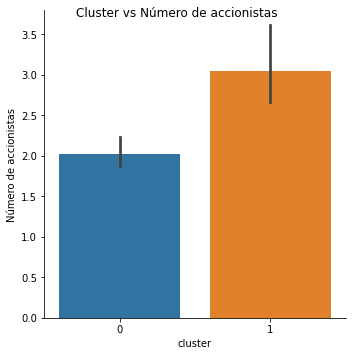

In [85]:
sns.catplot(x='cluster', y='Número de accionistas', kind='bar', data=data)
plt.suptitle('Cluster vs Número de accionistas')

Cluster 0 has more 'Accionistas' than cluster 1

Text(0.5, 0.98, 'Cluster vs # Empleados')

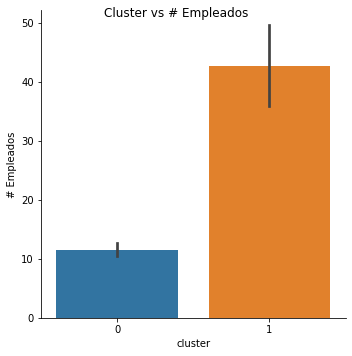

In [86]:
sns.catplot(x='cluster', y='# Empleados', kind='bar', data=data)
plt.suptitle('Cluster vs # Empleados')

Cluster 1 has more 'Empleados' than cluster 0

Text(0.5, 0.98, 'Cluster vs Mujeres en cargos directivos')

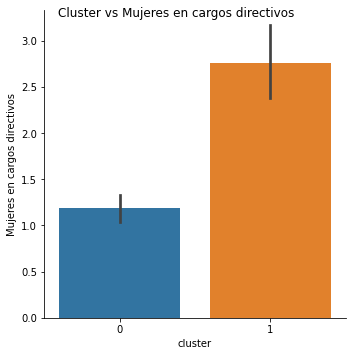

In [87]:
sns.catplot(x='cluster', y='Mujeres en cargos directivos', kind='bar', data=data)
plt.suptitle('Cluster vs Mujeres en cargos directivos')

Cluster 1 has more 'Mujeres en cargos directivos' than cluster 0

In [88]:
#--------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Cathegorical = 'Column name'

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    577 non-null    int64  
 1   client_id                     577 non-null    int64  
 2   loan_id                       577 non-null    int64  
 3   state                         577 non-null    object 
 4   arrears_days                  577 non-null    int64  
 5   total_paid                    577 non-null    float64
 6   percentage                    577 non-null    float64
 7   Monto Acumulado               577 non-null    int64  
 8   Uso de los recursos           577 non-null    object 
 9   Plazo                         577 non-null    object 
 10  Sector                        577 non-null    object 
 11  Ingresos                      577 non-null    object 
 12  Ubicación                     577 non-null    object 
 13  Estra

In [90]:
data.groupby('cluster')['state'].value_counts()/len(data)

cluster  state
0        PAID     0.329289
         LATE     0.185442
1        PAID     0.287695
         LATE     0.197574
Name: state, dtype: float64

Cluster 0 has more clients on state PAID than cluster 1, but at the same time has more clients on Late than cluster 1

In [91]:
data.groupby('cluster')['Uso de los recursos'].value_counts()/len(data)

cluster  Uso de los recursos
0        KT - CO                0.204506
         KT - EX                0.171577
         CR                     0.081456
         SP                     0.057192
1        KT - EX                0.176776
         KT - CO                0.169844
         CR                     0.081456
         SP                     0.057192
Name: Uso de los recursos, dtype: float64

We can see the distribution between the two clusters

In [92]:
data.groupby('cluster')['Plazo'].value_counts()/len(data)

cluster  Plazo            
0        13 a 24 meses        0.324090
         Menos de 12 meses    0.116118
         25 a 36 meses        0.072790
         Más de 37 meses      0.001733
1        Menos de 12 meses    0.202773
         13 a 24 meses        0.183709
         25 a 36 meses        0.081456
         Más de 37 meses      0.017331
Name: Plazo, dtype: float64

In [93]:
# Cluster 0 has more clients on 'Plazo' on 13 to 24 months. On the other hand we have cluster 1 with 'Plazo' less than 12 months

In [94]:
data.groupby('cluster')['Sector'].value_counts()/len(data)

cluster  Sector   
0        Servicios    0.343154
         Comercio     0.103986
         Industria    0.067591
1        Servicios    0.254766
         Industria    0.173310
         Comercio     0.057192
Name: Sector, dtype: float64

In [95]:
# Cluster 0 has a ranking of (Servicios, Comercio and Industria) - Cluster 1 has a ranking of (Servicios, Industria y Comercio)

In [96]:
data.groupby('cluster')['Ingresos'].value_counts()/len(data)

cluster  Ingresos
0        Seed        0.332756
         Venture     0.119584
         Scale Up    0.050260
         Growth      0.012132
1        Venture     0.176776
         Scale Up    0.109185
         Seed        0.103986
         Growth      0.095321
Name: Ingresos, dtype: float64

In [97]:
data.groupby('cluster')['Acceso previso a la banca'].value_counts()/len(data)

cluster  Acceso previso a la banca
0        Si                           0.270364
         No                           0.244367
1        Si                           0.433276
         No                           0.051993
Name: Acceso previso a la banca, dtype: float64

In [98]:
data.groupby('cluster')['Mujeres empresarias'].value_counts()/len(data)

cluster  Mujeres empresarias
0        No                     0.391681
         Si                     0.123050
1        No                     0.414211
         Si                     0.071057
Name: Mujeres empresarias, dtype: float64

In [99]:
data.groupby('cluster')['Activador'].value_counts()/len(data)

cluster  Activador                
0        FriendOrColleague            0.155979
         Internet                     0.090121
         CreditProfessionalContact    0.064125
         Other                        0.050260
         SocialNetworks               0.046794
         Newspapers                   0.041594
         Referrer                     0.038128
         CommunicationMedia           0.012132
         RutaN                        0.008666
         Fenalco                      0.006932
1        Other                        0.149047
         FriendOrColleague            0.142114
         CreditProfessionalContact    0.091854
         Internet                     0.057192
         Newspapers                   0.027730
         Email                        0.012132
         SocialNetworks               0.003466
         Referrer                     0.001733
Name: Activador, dtype: float64

In [100]:
data.groupby('cluster')['Website empresa'].value_counts()/len(data)

cluster  Website empresa
0        Si                 0.311958
         No                 0.202773
1        Si                 0.389948
         No                 0.095321
Name: Website empresa, dtype: float64

In [101]:
data.groupby('cluster')['Estrato Mínimo'].value_counts()/len(data)

cluster  Estrato Mínimo
0        4                 0.161179
         5                 0.159445
         3                 0.109185
         6                 0.077990
         2                 0.006932
1        4                 0.166378
         5                 0.155979
         6                 0.110919
         3                 0.051993
Name: Estrato Mínimo, dtype: float64

In [102]:
data.groupby('cluster')['Ubicación'].value_counts()/len(data)

cluster  Ubicación          
0        Bogotá D.C.            0.227036
         Medellín               0.185442
         Barranquilla           0.025997
         Envigado               0.019064
         Cali                   0.015598
         Bucaramanga            0.010399
         Pereira                0.005199
         Itagüí                 0.003466
         La Estrella            0.003466
         Manizales              0.003466
         Rionegro               0.003466
         Armenia                0.001733
         Cartagena de indias    0.001733
         Copacabana             0.001733
         La Ceja                0.001733
         Marinilla              0.001733
         Sabaneta               0.001733
         Santa Marta            0.001733
1        Bogotá D.C.            0.180243
         Medellín               0.178510
         La Estrella            0.036395
         Itagüí                 0.032929
         Sabaneta               0.019064
         Envigado           

In [103]:
data.groupby('cluster')['Procesos judiciales'].value_counts()/len(data)

cluster  Procesos judiciales
0        No                     0.481802
         Si                     0.032929
1        No                     0.360485
         Si                     0.124783
Name: Procesos judiciales, dtype: float64

In [104]:
data.groupby('cluster')['Instagram empresa'].value_counts()/len(data)

cluster  Instagram empresa
0        No                   0.285962
         Si                   0.228769
1        Si                   0.261698
         No                   0.223570
Name: Instagram empresa, dtype: float64

In [105]:
data.groupby('cluster')['Impacto'].value_counts()/len(data)

cluster  Impacto
0        No         0.461005
         Si         0.053726
1        No         0.457539
         Si         0.027730
Name: Impacto, dtype: float64

In [106]:
#end

In [107]:
#--------------------------------------------------------------------

### Multi-linear regression

In [108]:
X = data[['Huellas de Consulta', 'Score Bureau Empresa']]
Y = data['arrears_days']
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           arrears_days   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     24.68
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           5.21e-11
Time:                        11:29:58   Log-Likelihood:                -3606.5
No. Observations:                 577   AIC:                             7219.
Df Residuals:                     574   BIC:                             7232.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  123.8634 